In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop("Id", axis=1, inplace = True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_gender = LabelEncoder()
df["Species"] = labelencoder_gender.fit_transform(df["Species"])
df["Species"].unique()

array([0, 1, 2])

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

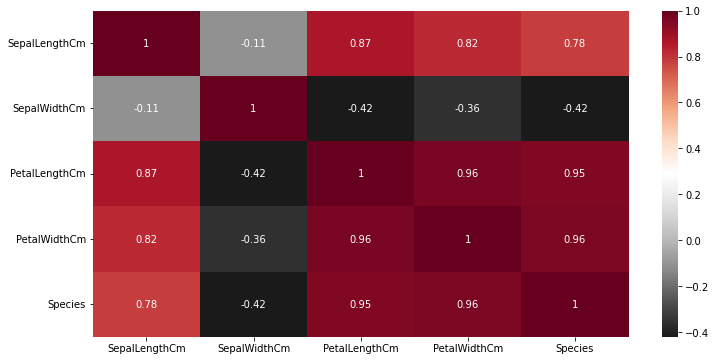

In [13]:
corrmat =df.corr()
top_features = corrmat.index
sns.heatmap(df[top_features].corr(),annot=True,cmap='RdGy_r')

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.shape

(150, 4)

In [16]:
y.shape

(150,)

In [17]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [19]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = "liblinear")
classifier.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [22]:
y_pred = classifier.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix , accuracy_score


acc = accuracy_score(y_pred,y_test)*100

In [24]:
print(acc)


88.88888888888889


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

x1 = sc.transform([[5.1,3.5,1.4,0.2]])
x2 = sc.transform([[5.8,2.7,4.1,1.0]])
x3 = sc.transform([[6.1,3.0,4.9,1.8]])

print("Species is :",classifier.predict(x1))

print("Species is :",classifier.predict(x2))

print("Species is :",classifier.predict(x3))


Species is : [0]
Species is : [1]
Species is : [2]


/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warning

In [26]:
x1 = float(input("Enter a number :"))

x2 = float(input("Enter a number :"))

x3 = float(input("Enter a number :"))

x4 = float(input("Enter a number :"))

x5 = sc.transform([[x1 , x2 , x3 , x4]])

print("Species is :",classifier.predict(x5))



Enter a number :5.1
Enter a number :6.2
Enter a number :7.3
Enter a number :0.4
Species is : [0]


/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/tajasvi/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
train, test = train_test_split(df, test_size=0.3) 

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [28]:
X_train = train.iloc[:,:-1] 
y_train = train.iloc[:,-1]

X_test = test.iloc[:,:-1] 
y_test = test.iloc[:,-1]

In [29]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
129,7.2,3.0,5.8,1.6
31,5.4,3.4,1.5,0.4
29,4.7,3.2,1.6,0.2
2,4.7,3.2,1.3,0.2
143,6.8,3.2,5.9,2.3


In [30]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
142,5.8,2.7,5.1,1.9
68,6.2,2.2,4.5,1.5
72,6.3,2.5,4.9,1.5
25,5.0,3.0,1.6,0.2
106,4.9,2.5,4.5,1.7


In [31]:
y_train.head()

129    2
31     0
29     0
2      0
143    2
Name: Species, dtype: int64

In [32]:
y_test.head()

142    2
68     1
72     1
25     0
106    2
Name: Species, dtype: int64

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred,y_test)*100


print(acc)

95.55555555555556


In [34]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier 

In [35]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred,y_test)*100


print(acc)

93.33333333333333


In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred,y_test)*100


print(acc)

95.55555555555556
